In [17]:
import os
import matplotlib.pyplot as plt
import numpy as np
import cv2
import base64
import json
import shutil

In [2]:
data_dir = "private_data/o-ring/20230925_105827"
filenames = sorted(os.listdir(data_dir))
filenames

['20230925_105829.jpg',
 '20230925_105913.jpg',
 '20230925_105918.jpg',
 '20230925_105923.jpg',
 '20230925_105928.jpg',
 '20230925_105932.jpg',
 '20230925_105937.jpg',
 '20230925_105941.jpg',
 '20230925_105945.jpg',
 '20230925_105949.jpg',
 '20230925_105954.jpg',
 '20230925_105958.jpg',
 '20230925_110002.jpg',
 '20230925_110005.jpg']

In [3]:
def find_first_one(arr):
    for i, value in enumerate(arr):
        if value==1:
            return i
    return -1

In [4]:
def find_bbox_coordinates(img_sub):

    horizontal_values = img_sub.sum(axis=0)
    horizontal_values[horizontal_values>0]=1

    vertical_values = img_sub.sum(axis=1)
    vertical_values[vertical_values>0]=1

    left = find_first_one(horizontal_values)
    right = horizontal_values.shape[0]-find_first_one(np.flip(horizontal_values))
    top = find_first_one(vertical_values)
    bottom = vertical_values.shape[0]-find_first_one(np.flip(vertical_values))
    
    return left, right, top, bottom

In [5]:
def find_bbox_from_two_imgs(img_before_bgr, img_after_bgr, threshold=70, kernel_size=(5, 5), visualize=False):

    # グレースケール
    img_before_gray = cv2.cvtColor(img_before_bgr, cv2.COLOR_BGR2GRAY)
    img_after_gray = cv2.cvtColor(img_after_bgr, cv2.COLOR_BGR2GRAY)

    # 2値化
    ret, img_before_binary = cv2.threshold(img_before_gray, threshold, 255, cv2.THRESH_BINARY)
    ret, img_after_binary = cv2.threshold(img_after_gray, threshold, 255, cv2.THRESH_BINARY)

    # 差分
    img_sub_binary = img_after_binary - img_before_binary

    ## Opening & Closing
    # カーネル（フィルタ）を定義します
    kernel = np.ones(kernel_size, np.uint8)  # 5x5の全要素が1の行列を作成します
    # Opening処理を適用します
    img_sub_binary = cv2.morphologyEx(img_sub_binary, cv2.MORPH_OPEN, kernel)
    # Closing処理を適用します
    img_sub_binary = cv2.morphologyEx(img_sub_binary, cv2.MORPH_CLOSE, kernel)

    left, right, top, bottom = find_bbox_coordinates(img_sub_binary)

    if visualize:
        cv2.rectangle(img_before_bgr, (left, top), (right, bottom), color=(255, 0, 0), thickness=3)
        cv2.rectangle(img_after_bgr, (left, top), (right, bottom), color=(255, 0, 0), thickness=3)

        img_before_rgb = cv2.cvtColor(img_before_bgr, cv2.COLOR_BGR2RGB)
        img_after_rgb = cv2.cvtColor(img_after_bgr, cv2.COLOR_BGR2RGB)

        plt.figure(figsize=(30, 10))

        plt.subplot(2,3,1)
        plt.imshow(img_before_rgb)
        plt.title("img_before_rgb")

        plt.subplot(2,3,2)
        plt.imshow(img_after_rgb)
        plt.title("img_after_rgb")

        plt.subplot(2,3,4)
        plt.imshow(img_before_binary, cmap="gray")
        plt.title("img_before_binary")

        plt.subplot(2,3,5)
        plt.imshow(img_after_binary, cmap="gray")
        plt.title("img_after_binary")

        plt.subplot(2,3,6)
        plt.imshow(img_sub_binary, cmap="gray")
        plt.title("img_sub_binary")
        
        plt.tight_layout()
    
    return left, right, top, bottom

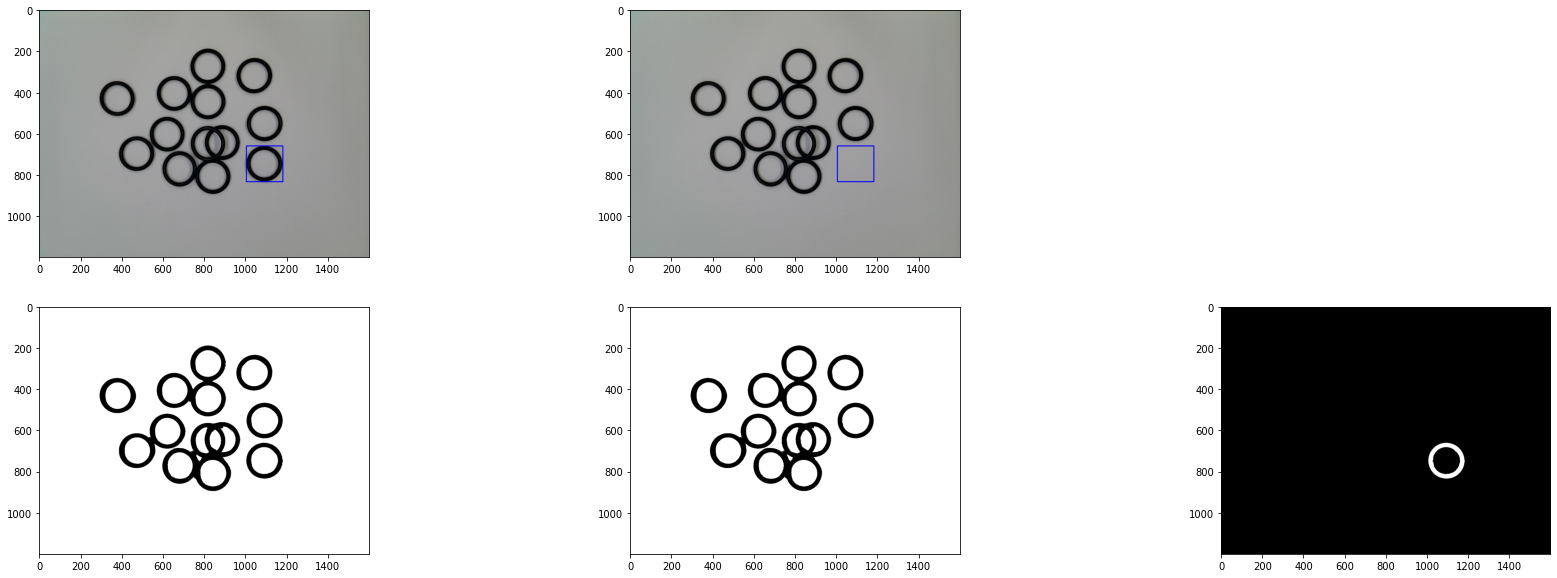

In [7]:
idx = 0
img_before_bgr = cv2.imread(os.path.join(data_dir, filenames[idx]))
img_after_bgr = cv2.imread(os.path.join(data_dir, filenames[idx+1]))

# グレースケール化
img_before_gray = cv2.cvtColor(img_before_bgr, cv2.COLOR_BGR2GRAY)
img_after_gray = cv2.cvtColor(img_after_bgr, cv2.COLOR_BGR2GRAY)

# 2値化
threshold = 110
ret, img_before_binary = cv2.threshold(img_before_gray, threshold, 255, cv2.THRESH_BINARY)
ret, img_after_binary = cv2.threshold(img_after_gray, threshold, 255, cv2.THRESH_BINARY)

# 差分
img_sub_binary = img_after_binary - img_before_binary

## Opening & Closing
# カーネル（フィルタ）を定義します
kernel_size = (5, 5)  # カーネルのサイズを設定します
kernel = np.ones(kernel_size, np.uint8)  # 5x5の全要素が1の行列を作成します
# Opening処理を適用します
img_sub_binary = cv2.morphologyEx(img_sub_binary, cv2.MORPH_OPEN, kernel)
# Closing処理を適用します
img_sub_binary = cv2.morphologyEx(img_sub_binary, cv2.MORPH_CLOSE, kernel)

left, right, top, bottom = find_bbox_coordinates(img_sub_binary)

cv2.rectangle(img_before_bgr, (left, top), (right, bottom), color=(255, 0, 0), thickness=3)
cv2.rectangle(img_after_bgr, (left, top), (right, bottom), color=(255, 0, 0), thickness=3)

img_before_rgb = cv2.cvtColor(img_before_bgr, cv2.COLOR_BGR2RGB)
img_after_rgb = cv2.cvtColor(img_after_bgr, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(30, 10))

plt.subplot(2,3,1)
plt.imshow(img_before_rgb)

plt.subplot(2,3,2)
plt.imshow(img_after_rgb)

plt.subplot(2,3,4)
plt.imshow(img_before_binary, cmap="gray")

plt.subplot(2,3,5)
plt.imshow(img_after_binary, cmap="gray")

plt.subplot(2,3,6)
plt.imshow(img_sub_binary, cmap="gray")

In [8]:
data_dir = "private_data/o-ring/20230925_105827"
filenames = sorted(os.listdir(data_dir))
filenames

['20230925_105829.jpg',
 '20230925_105913.jpg',
 '20230925_105918.jpg',
 '20230925_105923.jpg',
 '20230925_105928.jpg',
 '20230925_105932.jpg',
 '20230925_105937.jpg',
 '20230925_105941.jpg',
 '20230925_105945.jpg',
 '20230925_105949.jpg',
 '20230925_105954.jpg',
 '20230925_105958.jpg',
 '20230925_110002.jpg',
 '20230925_110005.jpg']

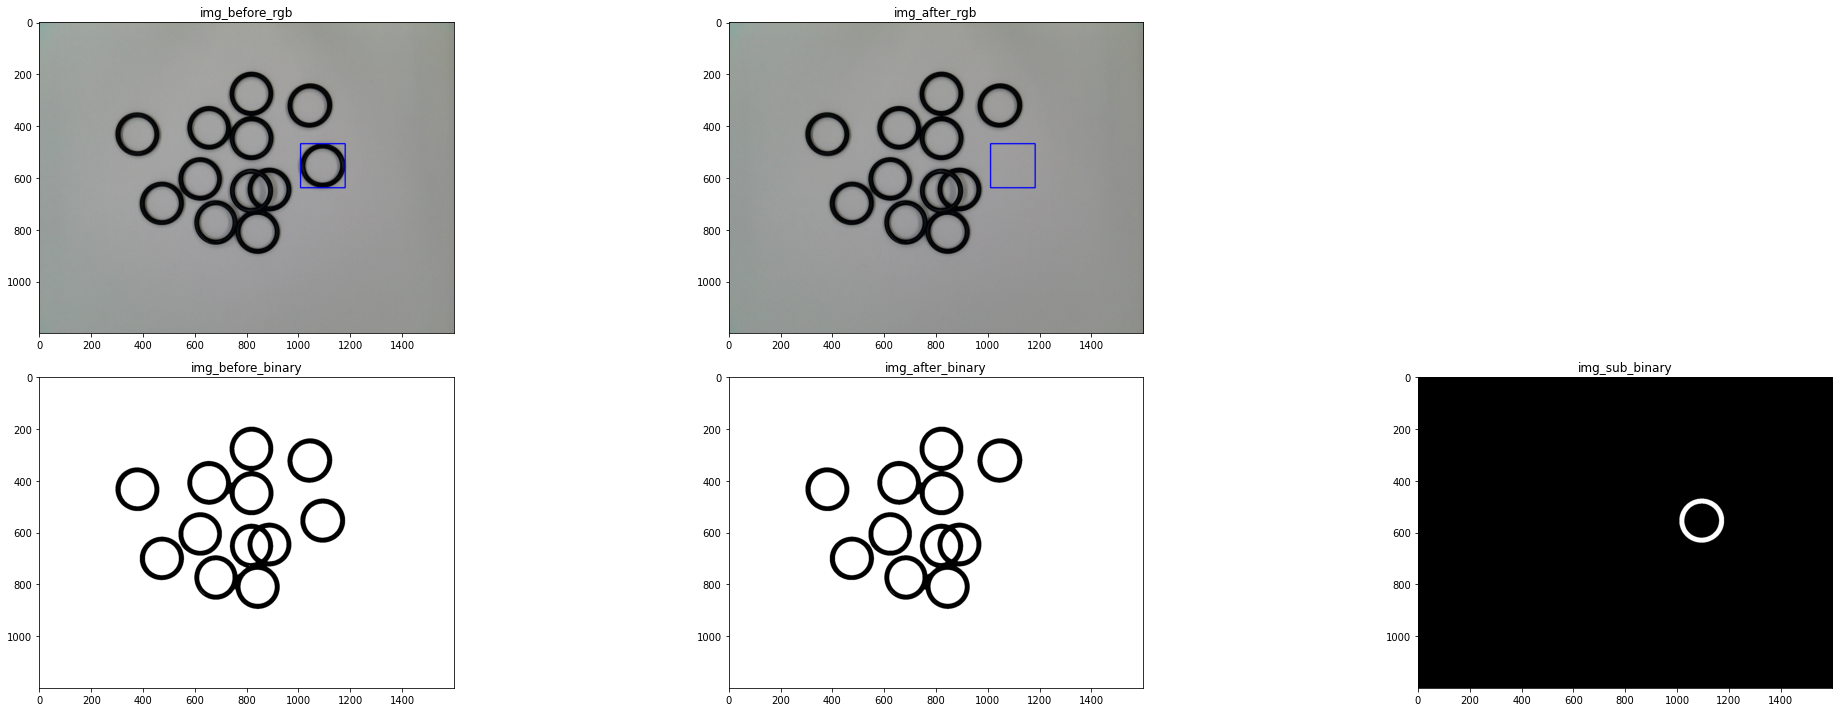

In [11]:
## 二枚の画像から1つのbboxを検出
idx = 1
img_before_bgr = cv2.imread(os.path.join(data_dir, filenames[idx]))
img_after_bgr = cv2.imread(os.path.join(data_dir, filenames[idx+1]))
bbox = find_bbox_from_two_imgs(img_before_bgr, img_after_bgr, threshold=50, kernel_size=(5,5), visualize=True)

(1006, 1180, 663, 834)
(1008, 1180, 469, 639)
(958, 1131, 237, 408)
(735, 903, 192, 365)
(732, 904, 365, 534)
(572, 740, 324, 492)
(295, 464, 349, 517)
(538, 705, 522, 689)
(388, 559, 616, 784)
(736, 903, 566, 737)
(804, 973, 562, 731)
(599, 768, 689, 860)
(758, 928, 727, 897)


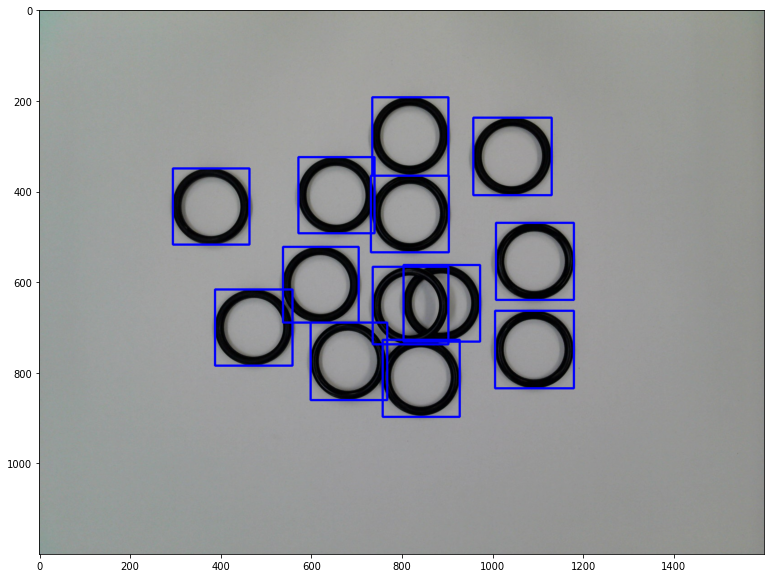

In [12]:
## フォルダ内の全ての画像からbboxを検出
bboxes = []

for idx in range(len(filenames)-1):
    img_before_bgr = cv2.imread(os.path.join(data_dir, filenames[idx]))
    img_after_bgr = cv2.imread(os.path.join(data_dir, filenames[idx+1]))
    
    bbox = find_bbox_from_two_imgs(img_before_bgr, img_after_bgr,
                                threshold=50,
                                kernel_size=(5, 5),
                                visualize=False)
    print(bbox)
    bboxes.append(bbox)
    
## 最初の画像にbboxを描画

img_original_bgr = cv2.imread(os.path.join(data_dir, filenames[0]))

for bbox in bboxes:
    left, right, top, bottom = bbox
    cv2.rectangle(img_original_bgr, (left, top), (right, bottom), color=(255, 0, 0), thickness=3)

img_original_rgb = cv2.cvtColor(img_original_bgr, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(15, 10))
plt.imshow(img_original_rgb)
    
    

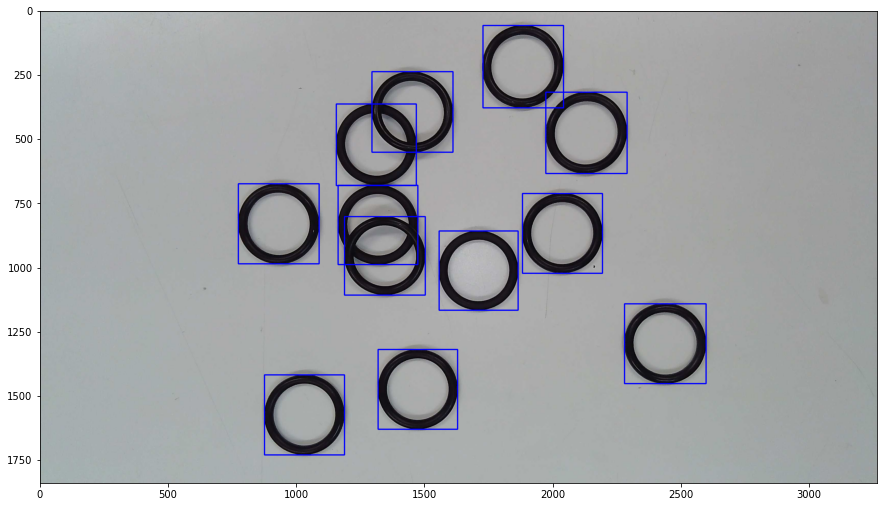

In [162]:
## 最初の画像に全てのbboxを描画

img_original_bgr = cv2.imread(os.path.join(data_dir, filenames[0]))

for bbox in bboxes:
    left, right, top, bottom = bbox
    cv2.rectangle(img_original_bgr, (left, top), (right, bottom), color=(255, 0, 0), thickness=3)

img_original_rgb = cv2.cvtColor(img_original_bgr, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(15, 10))
plt.imshow(img_original_rgb)
    

In [13]:
# labelme objectのshapeを作る関数
def generate_labelme_object_shape(label, bbox):
    left, right, top, bottom = bbox
    return {
        "label": label,
        "points": [[left, top], [right, bottom]],
        "group_id": None,
        "description": "",
        "shape_type": "rectangle",
        "flags": {}
    }


In [14]:
# 全てのbboxに対してshapeを作成しリスト化する関数

def generate_shapes_from_bboxes(label, bboxes):
    shapes = []
    for bbox in bboxes:
        shape = generate_labelme_object_shape(label, bbox)
        shapes.append(shape)
    
    return shapes

shapes = generate_shapes_from_bboxes(label="o-ring", bboxes=bboxes)

In [15]:
labelme_dir = "private_data/o-ring_labelme"
if not os.path.exists(labelme_dir):
    os.mkdirs(labelme_dir)

In [29]:
def save_annotation_data(filenames, shapes):
    filename = filenames[0]

    img_filepath_src = os.path.join(data_dir, filename)
    img_filepath_trg = os.path.join(labelme_dir, filename)
    shutil.copy2(img_filepath_src, img_filepath_trg)


    # jsonファイル名を作成
    filename_body = os.path.splitext(filename)[0] 
    json_filename = filename_body+".json"


    json_filepath = os.path.join(labelme_dir, json_filename)

    # 画像を読み込みサイズを取得
    img_filepath = os.path.join(data_dir, filename) # 元の画像
    img_original_bgr = cv2.imread(img_filepath)
    height, width, depth = img_original_bgr.shape

    # 画像をbase64にエンコード
    _, encoded = cv2.imencode(".jpg", img_original_bgr)
    img_base64 = base64.b64encode(encoded).decode("ascii")

    # json形式のlabelmeアノテーションデータを作成
    annotation_dict = {
        "version": "5.2.0.post4",
        "flags": {},
        "shapes": shapes,
        "imagePath": filename,
        "imageData": img_base64,
        "imageHeight":height,
        "imageWidth": width
        }

    # アノテーションデータを保存
    with open(json_filepath, "w") as json_file:
        json.dump(annotation_dict, json_file)
        print(json_filepath)

## 一括処理
その前に二値化処理などのパラメータを決めておく必要あり

In [30]:
main_dir = "private_data/o-ring_dataset"
subdirs = sorted(os.listdir(main_dir))

labelme_dir = "private_data/o-ring_labelme"
if not os.path.exists(labelme_dir): os.mkdirs(labelme_dir)

for subdir in subdirs:
    data_dir = os.path.join(main_dir, subdir)
    
    filenames = sorted(os.listdir(data_dir))


    # bboxを検出
    bboxes = []

    for idx in range(len(filenames)-1):
        img_before_bgr = cv2.imread(os.path.join(data_dir, filenames[idx]))
        img_after_bgr = cv2.imread(os.path.join(data_dir, filenames[idx+1]))
        bbox = find_bbox_from_two_imgs(img_before_bgr, img_after_bgr,
                                    threshold=80,
                                    kernel_size=(5, 5),
                                    visualize=False)
        #print(bbox)
        bboxes.append(bbox)

    # bbox
    shapes = generate_shapes_from_bboxes(label="o-ring", bboxes=bboxes)

    # アノテーションデータを保存
    save_annotation_data(filenames, shapes)
    


private_data/o-ring_labelme\20230925_105829.json
private_data/o-ring_labelme\20230925_110303.json
private_data/o-ring_labelme\20230925_110432.json
private_data/o-ring_labelme\20230925_110545.json
private_data/o-ring_labelme\20230925_110629.json
private_data/o-ring_labelme\20230925_110724.json
private_data/o-ring_labelme\20230925_110818.json
private_data/o-ring_labelme\20230925_110949.json
private_data/o-ring_labelme\20230925_111037.json
private_data/o-ring_labelme\20230925_111234.json
private_data/o-ring_labelme\20230925_111408.json
private_data/o-ring_labelme\20230925_111541.json
private_data/o-ring_labelme\20230925_111642.json
private_data/o-ring_labelme\20230925_111903.json
private_data/o-ring_labelme\20230925_112045.json
private_data/o-ring_labelme\20230925_112242.json
private_data/o-ring_labelme\20230925_112349.json
private_data/o-ring_labelme\20230925_112510.json
private_data/o-ring_labelme\20230925_112607.json
private_data/o-ring_labelme\20230925_112719.json
private_data/o-ring_

https://github.com/GreatV/labelme2yolo
ターミナルで実行
labelme2yolo --json_dir private_data/o-ring_labelme --val_size 0.15 --test_size 0.15



In [38]:
! labelme2yolo --json_dir private_data/o-ring_labelme --val_size 0.15 --test_size 0.15

'labelme2yolo' �́A�����R�}���h�܂��͊O���R�}���h�A
����\�ȃv���O�����܂��̓o�b�` �t�@�C���Ƃ��ĔF������Ă��܂���B


In [34]:
!python -m pip install labelme2yolo

  Using cached labelme2yolo-0.1.2-py3-none-any.whl (8.5 kB)
  Using cached numpy-1.24.4-cp310-cp310-win_amd64.whl (14.8 MB)

ERROR: Could not install packages due to an OSError: [WinError 5] アクセスが拒否されました。: 'C:\\Users\\iwamoto\\workspace\\venvs\\venv202201\\Lib\\site-packages\\~umpy\\.libs\\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll'
Check the permissions.


[notice] A new release of pip available: 22.3.1 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip



  Attempting uninstall: numpy
    Found existing installation: numpy 1.22.0
    Uninstalling numpy-1.22.0:
      Successfully uninstalled numpy-1.22.0
